In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import copy
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/home/jovyan/work/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378_raw.h5ad')
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Hao_PBMC_GSE164378_raw.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378_raw.h5ad')
adata.shape

(161764, 33538)

In [4]:
adata.obs.head()

celltype.l1 celltype.l2 celltype.l3   Batch donor  time  \
L1_AAACCCAAGAAACTCA        Mono   CD14 Mono   CD14 Mono  Batch1    P2     7   
L1_AAACCCAAGACATACA       CD4 T     CD4 TCM   CD4 TCM_1  Batch1    P1     7   
L1_AAACCCACAACTGGTT       CD8 T   CD8 Naive   CD8 Naive  Batch1    P4     2   
L1_AAACCCACACGTACTA          NK          NK        NK_2  Batch1    P3     7   
L1_AAACCCACAGCATACT       CD8 T   CD8 Naive   CD8 Naive  Batch1    P4     7   

                    lane Phase  nCount_ADT  nFeature_ADT  nCount_RNA  \
L1_AAACCCAAGAAACTCA   L1    G1        7535           217       10823   
L1_AAACCCAAGACATACA   L1    G1        6013           209        5864   
L1_AAACCCACAACTGGTT   L1     S        6620           213        5067   
L1_AAACCCACACGTACTA   L1    G1        3567           202        4786   
L1_AAACCCACAGCATACT   L1    G1        6402           215        6505   

                     nFeature_RNA  
L1_AAACCCAAGAAACTCA          2915  
L1_AAACCCAAGACATACA          1617  
L1_AAACCCACAACTGGTT          1381  
L1_AAACCCACACGTACTA          1890  
L1_AAACCCACAGCATACT          1621

In [5]:
type(adata.X)

scipy.sparse._csc.csc_matrix

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

## Normalization

In [6]:
# Normalization
# each observation (cell) has a total count equal to the median of total counts for observations (cells)
# sc.pp.normalize_total(adata, target_sum=None)  # see PreLect performance to see if target_sum is needed
# log1p transformation
sc.pp.log1p(adata)

In [7]:
# adata.raw = adata

In [8]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
# sc.pp.scale(adata, max_value=10)

In [9]:
type(adata.X)

scipy.sparse._csc.csc_matrix

## UMAP before batch effect correction

In [10]:
sc.tl.pca(adata, svd_solver="arpack")

In [11]:
# neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

2024-04-07 11:31:40.869954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 11:31:41.210106: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 11:31:41.998321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-04-07 11:31:41.998426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


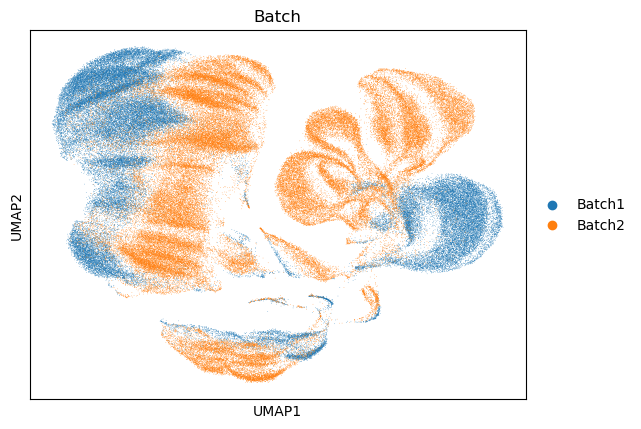

In [12]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='Batch')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


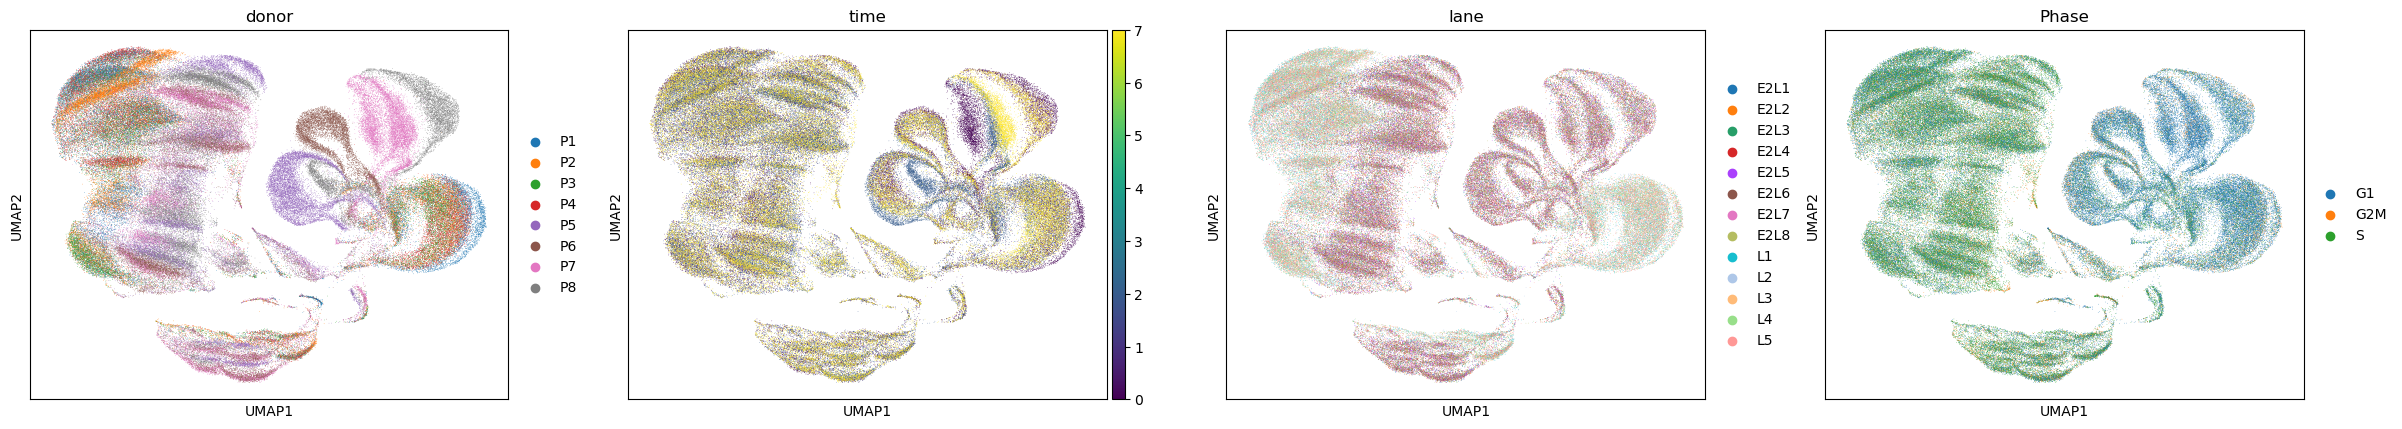

In [13]:
sc.pl.umap(adata, color=['donor', 'time', 'lane', 'Phase'])

## Batch effect correction with Harmony

In [15]:
import scanpy.external as sce

# sce.pp.harmony_integrate(adata, key='Batch')
sce.pp.harmony_integrate(adata, key=['Batch', 'donor'])

2024-04-07 11:34:40,848 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-07 11:35:28,440 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-07 11:35:28,892 - harmonypy - INFO - Iteration 1 of 10
2024-04-07 11:36:09,725 - harmonypy - INFO - Iteration 2 of 10
2024-04-07 11:36:50,877 - harmonypy - INFO - Iteration 3 of 10
2024-04-07 11:37:31,945 - harmonypy - INFO - Iteration 4 of 10
2024-04-07 11:38:13,346 - harmonypy - INFO - Iteration 5 of 10
2024-04-07 11:38:48,134 - harmonypy - INFO - Iteration 6 of 10
2024-04-07 11:39:13,973 - harmonypy - INFO - Iteration 7 of 10
2024-04-07 11:39:55,680 - harmonypy - INFO - Iteration 8 of 10
2024-04-07 11:40:36,951 - harmonypy - INFO - Converged after 8 iterations


In [16]:
# Harmony adds a new table in adata.obsm containing the adjusted PC’s.
'X_pca_harmony' in adata.obsm

True

In [17]:
# Use the batch-corrected PCs for calculating the neighbors
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca_harmony')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


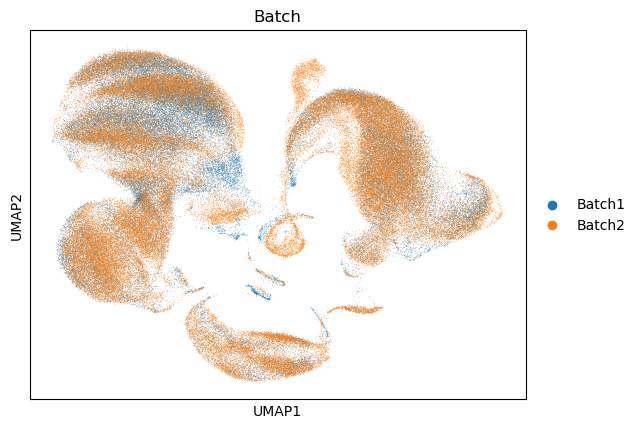

In [18]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='Batch')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


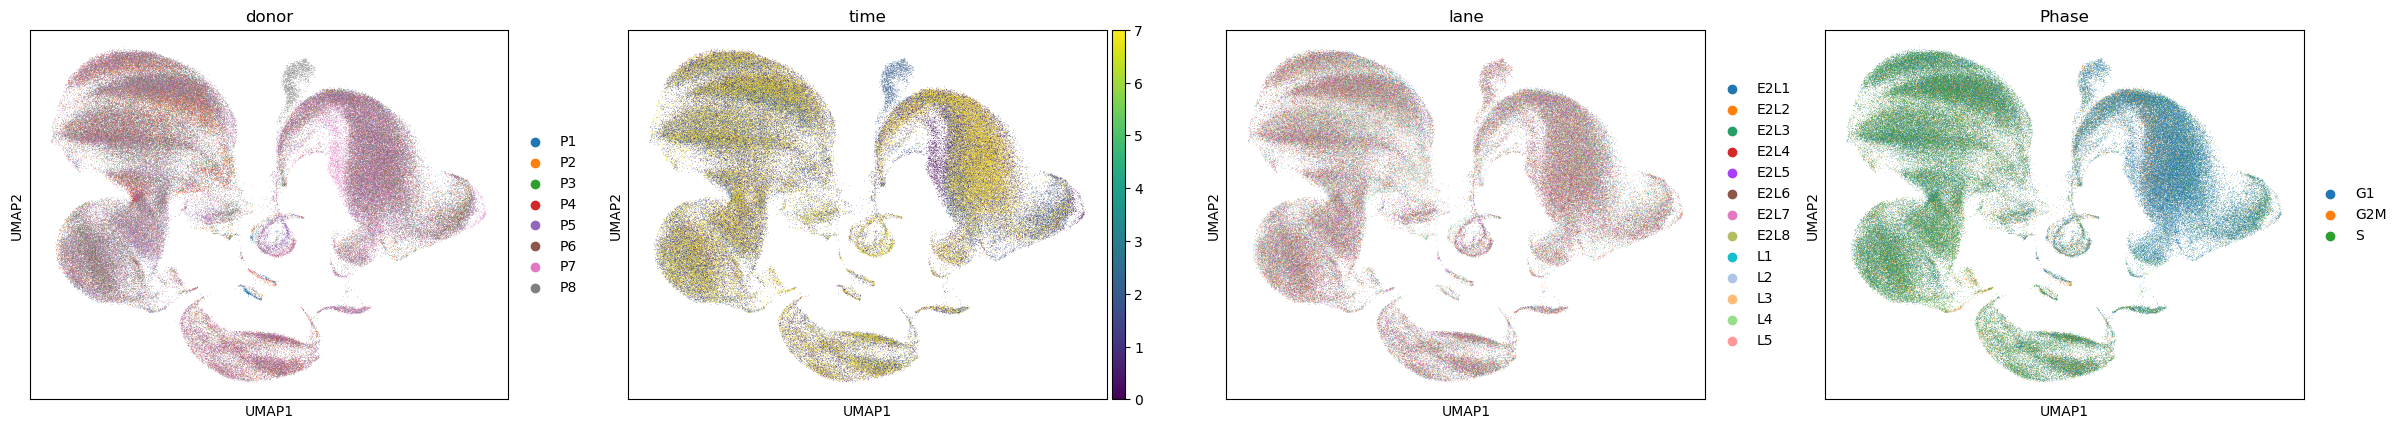

In [19]:
sc.pl.umap(adata, color=['donor', 'time', 'lane', 'Phase'])

## Leiden

In [20]:
sc.tl.leiden(adata, resolution=0.9)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [21]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)
sc.tl.umap(adata, init_pos='paga')


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


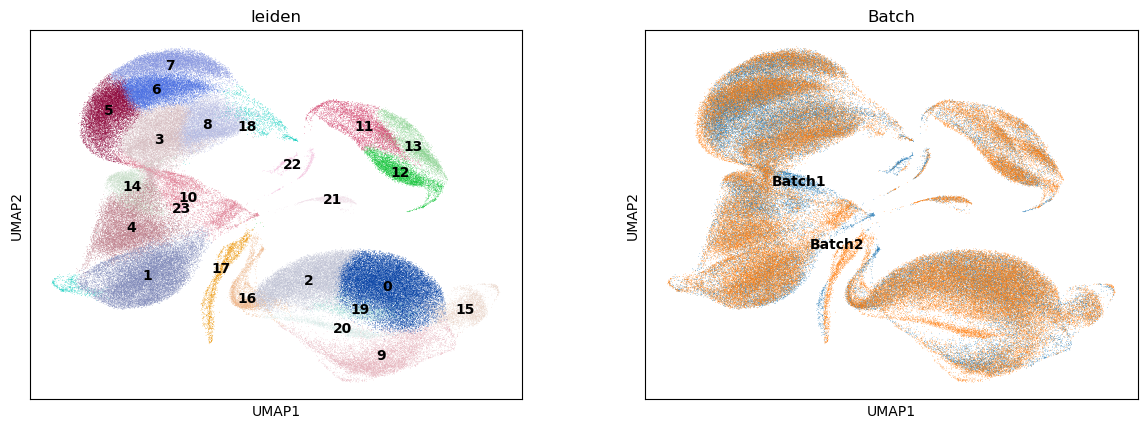

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


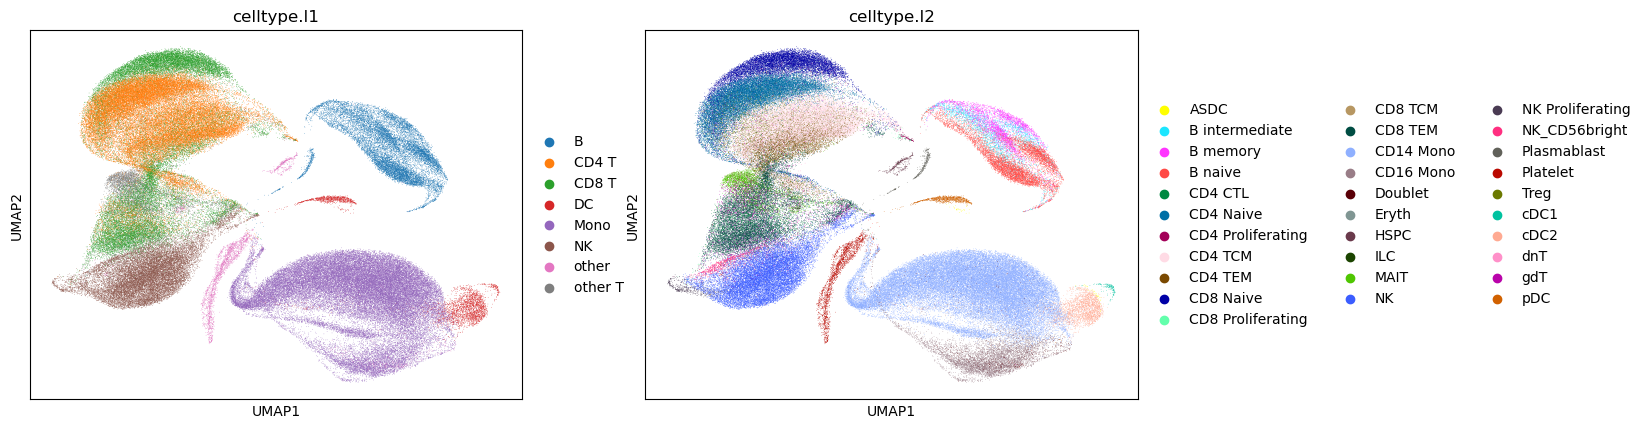

In [22]:
sc.pl.umap(adata, color=['leiden', 'Batch'], legend_loc="on data")
sc.pl.umap(adata, color=['celltype.l1', 'celltype.l2'], legend_loc="right margin")

In [23]:
adata.obs['leiden'].unique()

['0', '3', '7', '1', '4', ..., '15', '17', '23', '19', '20']
Length: 24
Categories (24, object): ['0', '1', '2', '3', ..., '20', '21', '22', '23']

In [24]:
adata.shape

(161764, 33538)

In [25]:
type(adata.X)

scipy.sparse._csc.csc_matrix

## Write Harmony-corrected to h5ad

In [26]:
# output_h5ad_path = r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Batch_corrected\Hao_PBMC_Harmony_unscaled.h5ad
output_h5ad_path = '/home/jovyan/work/Research_datasets/PBMC_Hao/GSE164378_Hao/Batch_corrected/test_harmony_no_cpm.h5ad'
adata.write(filename=output_h5ad_path)